In [1]:
import pandas as pd
dataset = pd.read_csv('C:/Users/Lapin/Documents/Pytest/dados/GFSA35A.csv')
dataset.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,15.8192,15.8192,14.3126,14.8507,14.812973,407867
1,2015-01-05,14.9583,14.9583,14.3126,14.5278,14.490892,928377
2,2015-01-06,14.5278,14.9583,14.3126,14.7431,14.705646,386949
3,2015-01-07,14.9583,15.3888,14.7431,15.1735,15.134953,743623
4,2015-01-08,15.3888,15.6040,14.8507,15.4964,15.457032,326855


In [2]:
dataset.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [3]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,15.8192,15.8192,14.3126,14.8507,14.812973,407867
1,2015-01-05,14.9583,14.9583,14.3126,14.5278,14.490892,928377
2,2015-01-06,14.5278,14.9583,14.3126,14.7431,14.705646,386949
3,2015-01-07,14.9583,15.3888,14.7431,15.1735,15.134953,743623
4,2015-01-08,15.3888,15.6040,14.8507,15.4964,15.457032,326855


In [4]:
dataset.shape

(1250, 7)

In [5]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1.250000e+03
mean,13.002271,13.269651,12.684416,12.980676,12.969530,1.096188e+06
std,4.238084,4.315810,4.122763,4.239343,4.228237,1.401864e+06
min,4.780000,4.930000,4.650000,4.770000,4.770000,0.000000e+00
25%,9.535000,9.631855,9.325833,9.464975,9.464975,3.273352e+05
50%,13.959500,14.205000,13.630750,13.882200,13.882200,6.614425e+05
75%,16.572500,16.904600,16.249701,16.545600,16.514022,1.366899e+06
max,21.199900,21.845600,20.769400,21.307501,21.307501,1.482710e+07


In [6]:
# Calcula a variação entre o preco de abertura e fechamento
dataset['Variation'] = dataset['Close'].sub(dataset['Open'])

In [7]:
# Calcula a variação entre o preço mínimo e preço máximo do dia
dataset['Variation MM'] = dataset['High'].sub(dataset['Low'])

In [8]:
dataset[dataset["Variation MM"] > 2]

,Date,Open,High,Low,Close,Adj Close,Volume,Variation,Variation MM
38,2015-02-27,16.357300,16.895300,14.7431,15.065900,15.027625,665771,-1.291400,2.152200
80,2015-04-30,17.756300,20.123800,17.6486,19.908501,19.857924,849130,2.152201,2.475200
404,2016-08-19,17.863899,19.047600,16.8953,18.832399,18.832399,2883092,0.968500,2.152300
408,2016-08-25,18.940001,18.940001,16.8953,17.218201,17.218201,1034441,-1.721800,2.044701
446,2016-10-20,19.693300,21.307501,19.2628,20.984699,20.984699,1334273,1.291399,2.044701
449,2016-10-25,21.199900,21.199900,19.0476,19.370399,19.370399,2091919,-1.829501,2.152300
761,2018-01-18,17.238600,18.835199,16.7966,18.582600,18.582600,3070381,1.344000,2.038599


In [9]:
#Verificando de existe alguma informação nula.
col_mask=dataset.isnull().any(axis=0)
row_mask=dataset.isnull().any(axis=1)
dataset.loc[row_mask,col_mask]

""


In [10]:
#Como identificou apenas dois registros com erro, eu não desconsiderei a massa de teste.
#Poderia apenas deletar estas linhas que não invalida meus testes ou arrumar os dados destas linhas. Foi o que eu resolvi fazer.
#dataset = dataset.drop(1037)

In [11]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)


In [12]:
x1=dataset.Date
y1=dataset.Close
data = [go.Scatter(x=x1, y=y1)]
layout = go.Layout(
   xaxis=dict(
       range=['02-01-2015','10-01-2020'],
       title='Ano'              
   ),
   yaxis=dict(
       range=[min(x1), max(y1)],
       title='Valor da Acao'
   ))
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)


In [13]:
# Vizualizando através do gráfico candlestick os 21 dias mais recentes da massa de dados

dataset2 = dataset.tail(21)
dados = go.Candlestick(x=dataset2.Date,
                       open=dataset2.Open,
                       high=dataset2.High,
                       low=dataset2.Low,
                       close=dataset2.Close,
                       )
data=[dados]
py.offline.iplot(data,filename='grafico_candlestick')


In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

x = dataset['Date']
y = dataset['Variation']

plt.plot_date(x,y, color='r',fmt="r-")

plt.xticks(rotation=30)
plt.suptitle('Gafisa variação dos preços entre Abertura e Fechamento')
plt.show()

<Figure size 640x480 with 1 Axes>

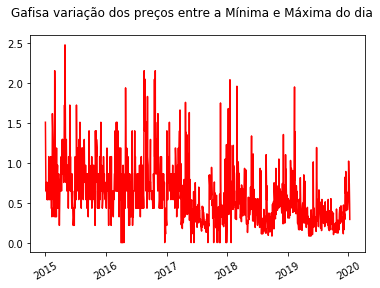

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

x = dataset['Date']
y = dataset['Variation MM']

plt.plot_date(x,y, color='r',fmt="r-")
plt.xticks(rotation=30)
plt.suptitle('Gafisa variação dos preços entre a Mínima e Máxima do dia')
plt.show()

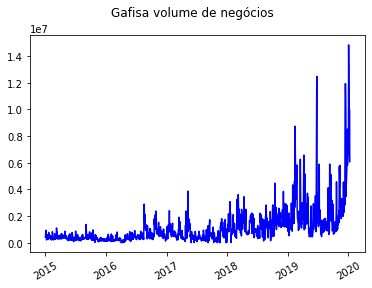

In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt


x = dataset['Date']
y = dataset['Volume']

plt.plot_date(x,y, color='b',fmt="b-")
plt.xticks(rotation=30)
plt.suptitle('Gafisa volume de negócios')
plt.show()


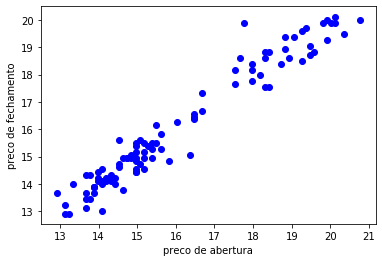

In [17]:
#Pegando os valores dos 246 primeiros registros da base, correspondendo ao 1 ano de 2015.
#Existe uma correlação entre essas duas variáveis
treino = dataset
x = treino.Open[:100]
y = treino.Close[:100]
plt.scatter(x,y,color='b')
plt.xlabel('preco de abertura')
plt.ylabel('preco de fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.autoscale('False')
plt.show()

In [18]:
dataset.Open[:10]
#dataset.Date[:10]

0    15.8192
1    14.9583
2    14.5278
3    14.9583
4    15.3888
5    15.2811
6    15.1735
7    14.9583
8    14.3126
9    13.9898
Name: Open, dtype: float64

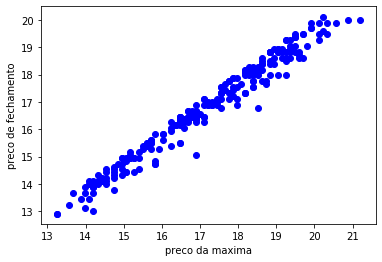

In [19]:

x = treino.High[:246]
y = treino.Close[:246]
plt.scatter(x,y,color='b')
plt.xlabel('preco da maxima')
plt.ylabel('preco de fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.autoscale('False')
plt.show()

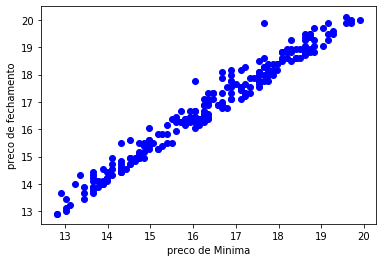

In [20]:
x = treino.Low[:246]
y = treino.Close[:246]
plt.scatter(x,y,color='b')
plt.xlabel('preco de Minima')
plt.ylabel('preco de fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.autoscale('False')
plt.show()

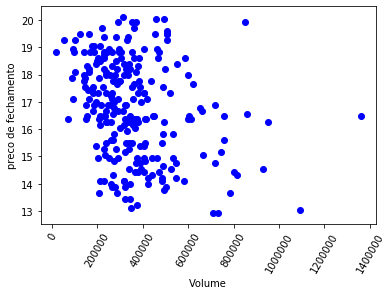

In [21]:
#Este gráfico mostra que no perído de 01 ano, a oscilação do preço ocorreu nos menores volumes.
x = treino.Volume[:246]
y = treino.Close[:246]
plt.scatter(x,y,color='b')
plt.xlabel('Volume')
plt.ylabel('preco de fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.ticklabel_format(style='plain', axis='x')
plt.autoscale('False')
plt.xticks(rotation=60)
plt.show()

In [22]:
##### Predições #####
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [25]:
#Treinando o modelo e fazendo predições
treino = dataset
feature = ['Open','High','Low','Volume']
treino = treino[feature]

y = dataset['Close']





In [28]:

X_treino, X_teste, y_treino, y_teste = train_test_split(treino, y,random_state=42)
X_treino.head()




,Open,High,Low,Volume
274,17.325800,17.863899,17.32580,201378
323,18.832399,19.155199,18.72480,540944
667,9.577700,9.577700,9.57770,0
377,15.604000,15.711600,15.17350,408824
620,8.460300,8.540120,8.34856,68284


In [29]:
#Modelo de regressão linear
lr_model = LinearRegression()

In [30]:
lr_model.fit(x_treino,y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
lr_model.coef_


array([-5.62279863e-01,  8.29654080e-01,  7.36376529e-01, -8.53821847e-09])

In [32]:
#Gera os valores de fechamento de acordo com o treino
lr_model.predict(x_teste)[:10]

array([10.52940647,  5.21821641, 15.36722422,  9.9784941 , 15.2470691 ,
       14.38071233, 11.77267834, 20.18886173, 14.37430434, 17.67363521])

In [33]:
#Valor real de fechamento
y_teste[:10]

680     10.679100
1102     5.410000
394     15.065900
930      9.967880
497     15.388800
462     14.635500
950     11.817100
81      19.908501
43      14.205000
128     17.325800
Name: Close, dtype: float64

In [34]:
lr_model.predict(x_teste)[:10]

array([10.52940647,  5.21821641, 15.36722422,  9.9784941 , 15.2470691 ,
       14.38071233, 11.77267834, 20.18886173, 14.37430434, 17.67363521])

In [35]:
from sklearn.metrics import mean_squared_error


In [36]:
# métrica usada para medir as diferenças entre os valores reais e preditos pelo modelo.
#Erro médio
RMSE = mean_squared_error(y_teste, lr_model.predict(x_teste))**0.5
print(RMSE)

0.19837451959307795


In [37]:
#Desta parte para baixo, ainda preciso entender melhor
#Melhorando o modelo
lr_model2 = LinearRegression()

In [38]:
features = ['Open','High','Low','Volume']
treino2 = treino[features]

In [39]:
treino2.head()

,Open,High,Low,Volume
0,15.8192,15.8192,14.3126,407867
1,14.9583,14.9583,14.3126,928377
2,14.5278,14.9583,14.3126,386949
3,14.9583,15.3888,14.7431,743623
4,15.3888,15.6040,14.8507,326855


In [40]:
x_treino, x_teste, y_treino, y_teste = train_test_split(treino2, y, test_size=0.33, random_state=42)

In [41]:
lr_model2.fit(x_treino,y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
lr_model2.coef_

array([-5.65320684e-01,  8.39964318e-01,  7.28536654e-01, -9.82925208e-09])

In [43]:
RMSE = mean_squared_error(y_teste, lr_model2.predict(x_teste))**0.5
print(RMSE)

0.19332891907795294
